In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# FIX ME: Root dir as argument
root_dir = "../../data/picklerCheckpoints/"
is_compressed = True;


In [2]:
import numpy as np
import pandas as pd
import nbimporter
import geopandas as gpd
from matplotlib import pyplot as plt
import commons.utility.pickle_util as pickle
import Preprocessing.DataEnrichment as de
import Preprocessing.SpatialMapping as sm
import Preprocessing.Discretization as dis
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import time

coord_system = {'init': 'epsg:4326'}

Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\commons\utility\pickle_util.ipynb
Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\DataEnrichment.ipynb
Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\SpatialMapping.ipynb
Importing Jupyter notebook from C:\Users\KaavyaaStalinThara\Downloads\New folder\ML2020-Uber-Data-Analysis-main\Preprocessing\Discretization.ipynb


In [3]:
data = sm.run(['jun', 'jul'])

Data for the month :jun Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jun14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jun14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :jul Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jul14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-jul14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [4]:
df = data

In [5]:
df['region'] = df['zone'] + ':' + df['borough']

In [6]:
df = dis.encode(df, ['region', 'weatherCondition'])

Result Saved in ../data/encodedMappings/region.p
Result Saved in ../data/encodedMappings/weatherCondition.p


In [7]:
#df

In [8]:
data

,Date/Time,Lat,Lon,Base,datetime,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,geometry,index_right,zone,LocationID,borough,borough_categ,region
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512,06-01-2014:00,0,63.0,1024.0,291.18,120.0,4.0,weekend,POINT (-73.99200 40.72930),78.0,East Village,79.0,Manhattan,3.0,75
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512,06-01-2014:00,0,63.0,1024.0,291.18,120.0,4.0,weekend,POINT (-73.99200 40.72930),112.0,Greenwich Village North,113.0,Manhattan,3.0,106
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512,06-01-2014:00,0,63.0,1024.0,291.18,120.0,4.0,weekend,POINT (-73.99200 40.72930),113.0,Greenwich Village South,114.0,Manhattan,3.0,107
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512,06-01-2014:00,0,63.0,1024.0,291.18,120.0,4.0,weekend,POINT (-74.00970 40.71310),230.0,TriBeCa/Civic Center,231.0,Manhattan,3.0,225
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512,06-01-2014:00,0,63.0,1024.0,291.18,120.0,4.0,weekend,POINT (-74.00970 40.71310),260.0,World Trade Center,261.0,Manhattan,3.0,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764,07-31-2014:23,0,54.0,1019.0,298.71,200.0,2.0,weekday,POINT (-74.00380 40.72250),124.0,Hudson Sq,125.0,Manhattan,3.0,118
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764,07-31-2014:23,0,54.0,1019.0,298.71,200.0,2.0,weekday,POINT (-74.00380 40.72250),210.0,SoHo,211.0,Manhattan,3.0,205
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764,07-31-2014:23,0,54.0,1019.0,298.71,200.0,2.0,weekday,POINT (-74.00380 40.72250),230.0,TriBeCa/Civic Center,231.0,Manhattan,3.0,225
796120,7/31/2014 23:58:00,40.7199,-73.9884,B02764,07-31-2014:23,0,54.0,1019.0,298.71,200.0,2.0,weekday,POINT (-73.98840 40.71990),147.0,Lower East Side,148.0,Manhattan,3.0,142


In [9]:
columns = ['datetime', 'region', 'weatherCondition', 'humidity', 'pressure', 'temperature', 'windDirection', 'windSpeed']
training_data = df


In [10]:
#training_data = training_data.groupby(['Date/Time', 'region'])['count'].sum().reset_index()

In [11]:
training_data['datetime'] = pd.to_datetime(training_data['datetime'], format='%m-%d-%Y:%H')
# training_data['Date/Time'] = training_data['Date/Time'].map(dt.datetime.toordinal)
# training_data['datetime'] = training_data['Date/Time'].dt.strftime('%m-%d-%Y:%H')
training_data['datetime'] = training_data['datetime'].apply(lambda x: time.mktime(x.timetuple()))
training_data = training_data[columns]
training_data['count'] = 1

<ipython-input-11-9de6ec1ba355>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['count'] = 1


In [12]:
training_data = training_data.groupby(columns)['count'].sum().reset_index()



In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( training_data[columns], training_data[columns], test_size=0.33, random_state=42)

In [19]:
#Secound check based on min_samples
X = training_data[columns]
y = training_data[columns]
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
regression_model1 = DecisionTreeRegressor(min_samples_leaf=30) 
regression_model2 = DecisionTreeRegressor(min_samples_leaf=15) 

#Fit the model
regression_model1.fit(X,y)
regression_model2.fit(X,y)

#Prediction
predicted1 = regression_model1.predict(X_test)
predicted2 = regression_model2.predict(X_test)



In [20]:
#Third check is bassed on max_depth
X = training_data[columns]
y = training_data[columns]
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
#Based on max_depth
regression_model1 = DecisionTreeRegressor(criterion="mse",max_depth=5) 
regression_model2 = DecisionTreeRegressor(criterion="mse",max_depth=2) 

#Fit the model
regression_model1.fit(X,y)
regression_model2.fit(X,y)

#Prediction
predicted1 = regression_model1.predict(X_test)
predicted2 = regression_model2.predict(X_test)



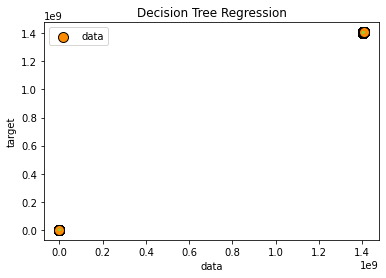

In [21]:

# Plot the results
plt.figure()
plt.scatter(X, y, s=100, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, predicted1, color="cornflowerblue", linewidth=2)
plt.plot(X_test, predicted2, color="yellowgreen", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [22]:
#Accuracy and error evaluation

In [23]:
from sklearn import metrics

In [24]:
print(metrics.mean_absolute_error(X_test, predicted2))
print(metrics.mean_squared_error(X_test, predicted2))
print(metrics.r2_score(X_test, predicted2))

40935.66083121212
17863849504.80915
0.1940195029913248
